C:\Users\Parv\Documents\University\Astro\Photometry\env\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 57 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


<AxesSubplot:title={'center':'Target ID: 11904151, Cadence: 568'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

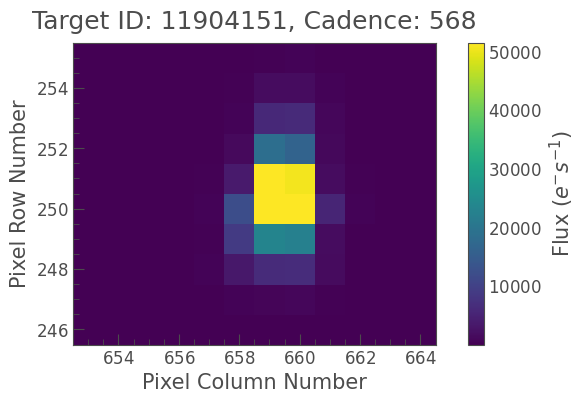

In [2]:
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np
!pip install lightkurve

pixels = lk.search_targetpixelfile('Kepler-10').download()
pixels.plot()

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

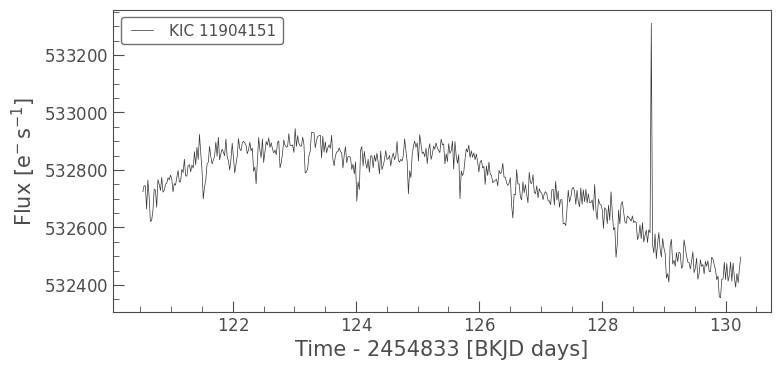

In [10]:
lightcurve = pixels.to_lightcurve()
lightcurve.plot()

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

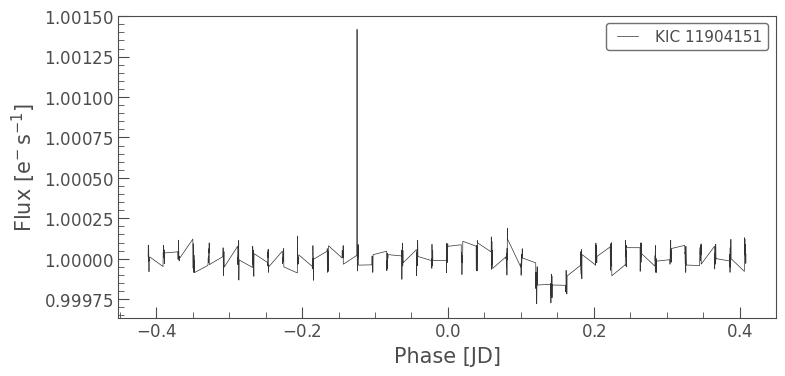

In [11]:
exoplanet = lightcurve.flatten().fold(period=0.838)
exoplanet.plot()

Looking at Tabby's Star 

<AxesSubplot:title={'center':'Target ID: 8462852, Cadence: 66714'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

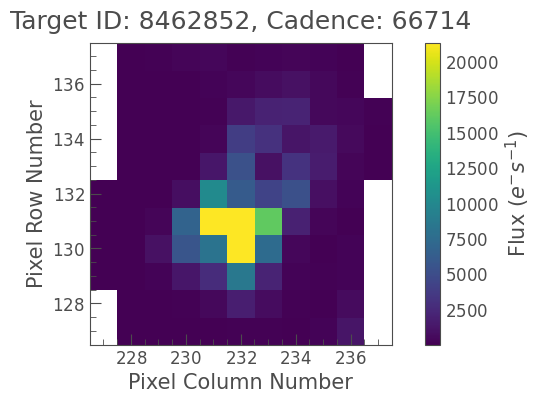

In [12]:
tabbyfile = lk.search_targetpixelfile("KIC 8462852",
quarter=16).download(quality_bitmask='hardest')
tabbyfile.plot(frame=1)

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

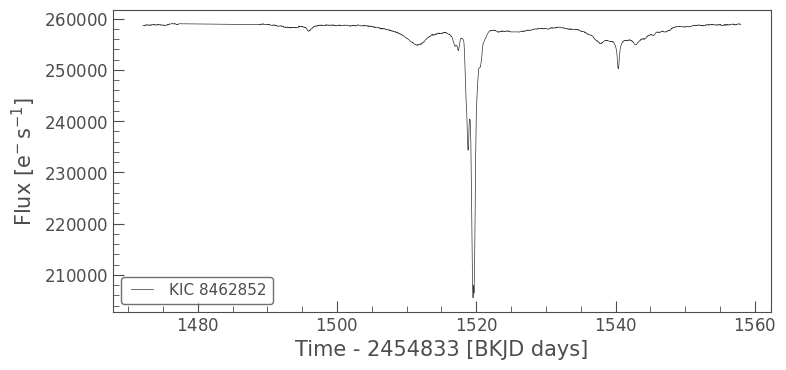

In [16]:
lc = tabbyfile.to_lightcurve(aperture_mask='all')
lc.plot()

Kepler from LightCurve tutorials - https://docs.lightkurve.org/tutorials/1-getting-started/what-are-lightcurve-objects.html 1.1

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

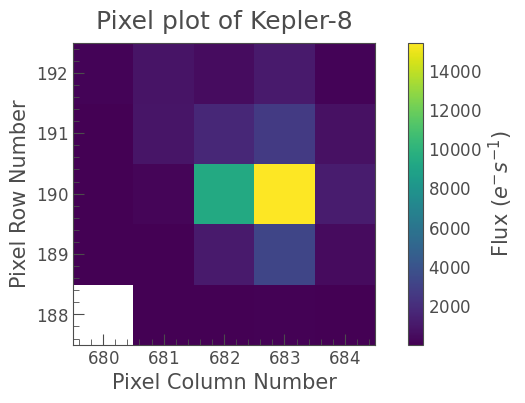

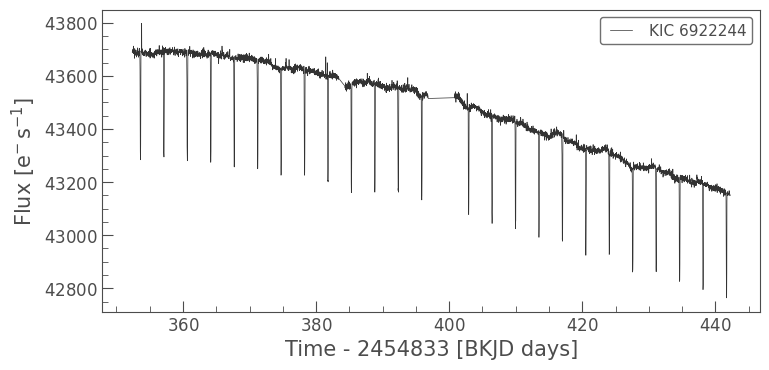

In [28]:
tpf = lk.search_targetpixelfile('KIC 6922244', author="Kepler", cadence="long", quarter=4).download()
tpf.plot(title="Pixel plot of Kepler-8")
# Convert target pixel file to Lightcurve using aperture mask
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)
lc.plot(title="Lightcurve of Kepler-8(KIC 6922244)")

Text(0.5, 1.0, 'Lightcurve of Kepler-8(KIC 6922244)')

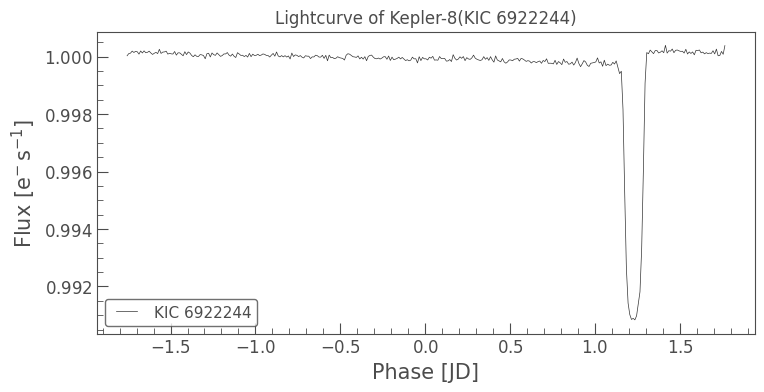

In [22]:
lc.remove_nans().flatten(window_length=401).fold(period=3.5225).bin(time_bin_size=0.01).plot(title = "KIC 6922244")
plt.title("Lightcurve of Kepler-8(KIC 6922244)")

pg = lc.to_periodogram(oversample_factor=1)
pg.plot()
import astropy.units as u
print(pg.period_at_max_power)